# Plotting

/tmp/ipykernel_152749/2156828852.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loss_np_array = torch.load(filename_loss)


data.shape (7314, 5)
sample of data points: first 10 and last 10
[[0.00587513 0.01066756 0.08441452 0.08441452 0.        ]
 [0.00424963 0.00506872 0.04124935 0.04124935 1.        ]]
[[8.90618656e-04 9.12958283e-05 1.00833150e-03 7.44461778e-04
  7.31200000e+03]
 [9.28369234e-04 9.01171593e-05 9.67011774e-04 7.44461778e-04
  7.31300000e+03]]
after gaussian [[9.03227730e-04 9.04282839e-05 1.00804564e-03 7.44461778e-04
  7.31146279e+03]
 [9.05162614e-04 9.04235218e-05 1.00396396e-03 7.44461778e-04
  7.31183830e+03]]
(7314, 5)
/data/zwl/checkpoints/f38-v0.5.7-mse-relative-loss.pt has been ploted and saved into fig/f38-v0.5.7-mse-relative-loss.pt.pdf


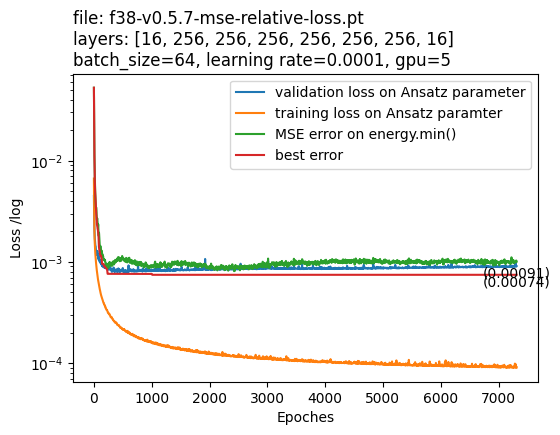

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
######################### config #######################3
#result_folder='checkpoints'
result_folder='/data/zwl/checkpoints'
filename='f38-v0.5.7-mse-relative-loss.pt'
#filename='m4-float32-batchsize512-layers16_512_512_512_512_512_10-loss.pt'
#filename='m4-float32-batchsize1024-layers16_512_512_512_512_512_10-loss.pt'
filename_loss=f'{result_folder}/{filename}'
fig_folder='fig'



filename_fig =f'{fig_folder}/{filename}.pdf'
filename_config_json = filename_loss[:-8] +'.json'

if os.path.exists(filename_config_json):

    with open(filename_config_json,'r') as f:
        cfg = json.load(f)
        try:
            title = f"file: {filename}\nlayers: {cfg['LAYERS']}\nbatch_size={cfg['batch_size']}, learning rate={cfg['learning_rate']}, gpu={cfg['gpu']}"
        except:
            title = f"file: {filename}\nbatch_size={cfg['batch_size']}, learning rate={cfg['learning_rate']}, gpu={cfg['gpu']}"
else:
    title=filename

# print local variables
#local=locals().copy()
#for k in local:
#    if k[0:2] != '__':      #skip built-in modules
#        print(f'{k}:\t{local[k]}')


import torch
loss_np_array = torch.load(filename_loss)
data=loss_np_array
print('data.shape',data.shape)
print('sample of data points: first 10 and last 10')
print(data[:2])
print(data[-2:])
#print(data)

scale=1
if False and len(data) > 2000:
    data = data[::10]
    scale = scale * 10
    print('sparsify data to ',data.shape)

# increase sigma you can get a more smoothed function.
from scipy.ndimage import gaussian_filter1d
data = gaussian_filter1d(data, sigma=2,axis=0)
print('after gaussian',data[-2:])

#plt.figure(figsize=(9, 7))
plt.figure(figsize=(6, 4))
#figsize=(9, 11)
print(data.shape)

labels= ['validation loss','training loss','err','best err', 'epoch']

if data.shape[1] == 2:
    plt.plot(data, label=['validation loss','training loss'])
elif data.shape[1] == 5:
    #print(data)
    if True:
        #data[:,2:4] = data[:,2:4]/10
        labels= ['validation loss on Ansatz parameter','training loss on Ansatz paramter','MSE error on energy.min()','best error', 'epoch']
    plt.plot(data[:,:4], label=labels[:4])
    for i in [0,3]:
        # display value of the last point
        x=data.shape[0]
        y=data[-1,i]
        #print( filename_fig,'xy',x,y)
        plt.annotate(f'({y:.5f})', (x, y), ha='center',va='top')
    #plt.plot(data[:,:4], label=['validation loss','training loss','acc','best acc'])
else:
    plt.plot(data, label='validation loss')
#plt.ylim(0.001, 0.9)
#plt.tight_layout()
#plt.title(filename)
plt.title(title,loc='left')
plt.ylabel("Loss /log")
#plt.xlabel(f"Epoches x {scale}")
plt.xlabel(f"Epoches")
plt.yscale('log')
plt.legend(loc=0);
#plt.savefig(filename_fig)

print(f'{filename_loss} has been ploted and saved into {filename_fig}')


/tmp/ipykernel_152749/428284876.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loss_np_array = torch.load(filename_loss)


data.shape (753, 5)
sample of data points: first 10 and last 10
[[0.06477    0.07794682 0.00778979 0.00778979 0.        ]
 [0.05330365 0.05886577 0.00430652 0.00430652 1.        ]]
[[2.44880188e-02 2.57908220e-02 3.37879413e-04 3.05409377e-04
  7.51000000e+02]
 [2.49707028e-02 2.59098646e-02 3.06195238e-04 3.05409377e-04
  7.52000000e+02]]
after gaussian [[2.49517149e-02 2.58789473e-02 3.28791189e-04 3.05409377e-04
  7.50462789e+02]
 [2.48775589e-02 2.58785214e-02 3.25681903e-04 3.05409377e-04
  7.50838300e+02]]
(753, 5)
/data/zwl/checkpoints/p2-v0.5.1-mse-relative-loss.pt has been ploted and saved into fig/p2-v0.5.1-mse-relative-loss.pt.pdf


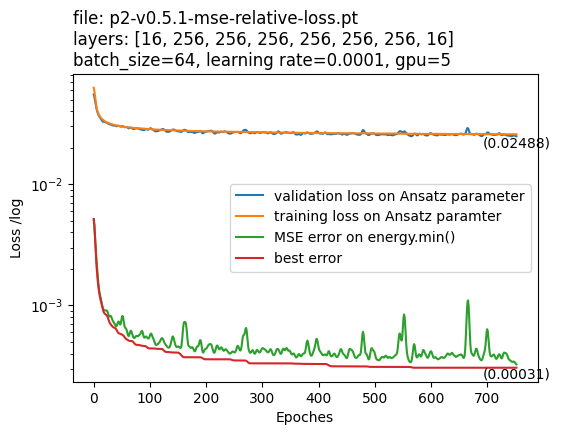

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
######################### config #######################3
#result_folder='checkpoints'
result_folder='/data/zwl/checkpoints'
filename='p2-v0.5.1-mse-relative-loss.pt'
#filename='m4-float32-batchsize512-layers16_512_512_512_512_512_10-loss.pt'
#filename='m4-float32-batchsize1024-layers16_512_512_512_512_512_10-loss.pt'
filename_loss=f'{result_folder}/{filename}'
fig_folder='fig'



filename_fig =f'{fig_folder}/{filename}.pdf'
filename_config_json = filename_loss[:-8] +'.json'

if os.path.exists(filename_config_json):

    with open(filename_config_json,'r') as f:
        cfg = json.load(f)
        try:
            title = f"file: {filename}\nlayers: {cfg['LAYERS']}\nbatch_size={cfg['batch_size']}, learning rate={cfg['learning_rate']}, gpu={cfg['gpu']}"
        except:
            title = f"file: {filename}\nbatch_size={cfg['batch_size']}, learning rate={cfg['learning_rate']}, gpu={cfg['gpu']}"
else:
    title=filename

# print local variables
#local=locals().copy()
#for k in local:
#    if k[0:2] != '__':      #skip built-in modules
#        print(f'{k}:\t{local[k]}')


import torch
loss_np_array = torch.load(filename_loss)
data=loss_np_array
print('data.shape',data.shape)
print('sample of data points: first 10 and last 10')
print(data[:2])
print(data[-2:])
#print(data)

scale=1
if False and len(data) > 2000:
    data = data[::10]
    scale = scale * 10
    print('sparsify data to ',data.shape)

# increase sigma you can get a more smoothed function.
from scipy.ndimage import gaussian_filter1d
data = gaussian_filter1d(data, sigma=2,axis=0)
print('after gaussian',data[-2:])

#plt.figure(figsize=(9, 7))
plt.figure(figsize=(6, 4))
#figsize=(9, 11)
print(data.shape)

labels= ['validation loss','training loss','err','best err', 'epoch']

if data.shape[1] == 2:
    plt.plot(data, label=['validation loss','training loss'])
elif data.shape[1] == 5:
    #print(data)
    if True:
        #data[:,2:4] = data[:,2:4]/10
        labels= ['validation loss on Ansatz parameter','training loss on Ansatz paramter','MSE error on energy.min()','best error', 'epoch']
    plt.plot(data[:,:4], label=labels[:4])
    for i in [0,3]:
        # display value of the last point
        x=data.shape[0]
        y=data[-1,i]
        #print( filename_fig,'xy',x,y)
        plt.annotate(f'({y:.5f})', (x, y), ha='center',va='top')
    #plt.plot(data[:,:4], label=['validation loss','training loss','acc','best acc'])
else:
    plt.plot(data, label='validation loss')
#plt.ylim(0.001, 0.9)
#plt.tight_layout()
#plt.title(filename)
plt.title(title,loc='left')
plt.ylabel("Loss /log")
#plt.xlabel(f"Epoches x {scale}")
plt.xlabel(f"Epoches")
plt.yscale('log')
plt.legend(loc=0);
#plt.savefig(filename_fig)

print(f'{filename_loss} has been ploted and saved into {filename_fig}')


In [1]:
print('plot graph for the paper')

plot graph for the paper


test


In [5]:
import numpy as np

In [5]:
filename='/home/zwl/download/ACSE-universal-ansatze/main-branch/ACSE-universal-ansatze/eigen.npy'
d=np.load(filename)

In [6]:
d

array([-2.61803399+0.j, -2.61789581+0.j, -2.61775765+0.j, ...,
       -1.99249387+0.j, -1.99246846+0.j, -1.99244304+0.j])

In [7]:
d[0]

np.complex128(-2.6180339887498953+0j)

In [8]:
d.shape

(10001,)

In [16]:
data=np.load('results/hubbard_loss.npy')
data

array([[4.93798196e-01, 1.54823810e-01, 2.23860598e+00, 2.23860598e+00],
       [2.07385719e-01, 6.11843728e-02, 5.04626274e-01, 5.04626274e-01],
       [5.99988550e-02, 1.37808193e-02, 2.22298205e-01, 2.22298205e-01],
       [1.98457409e-02, 3.26904142e-03, 8.58744159e-02, 8.58744159e-02],
       [6.45704148e-03, 1.41452835e-03, 2.75542531e-02, 2.75542531e-02],
       [2.64720852e-03, 1.12498319e-03, 1.08030913e-02, 1.08030913e-02],
       [1.60935230e-03, 9.11757059e-04, 5.90499816e-03, 5.90499816e-03],
       [1.13938213e-03, 7.15170812e-04, 3.83319613e-03, 3.83319613e-03],
       [8.53154110e-04, 5.59154898e-04, 2.70161545e-03, 2.70161545e-03],
       [6.49101217e-04, 4.23395104e-04, 2.03175074e-03, 2.03175074e-03],
       [4.89562226e-04, 3.02317698e-04, 1.63531688e-03, 1.63531688e-03],
       [3.66586872e-04, 2.07885518e-04, 1.39882520e-03, 1.39882520e-03],
       [2.80160457e-04, 1.46401740e-04, 1.24064926e-03, 1.24064926e-03],
       [2.26035409e-04, 1.12512404e-04, 1.12848647e

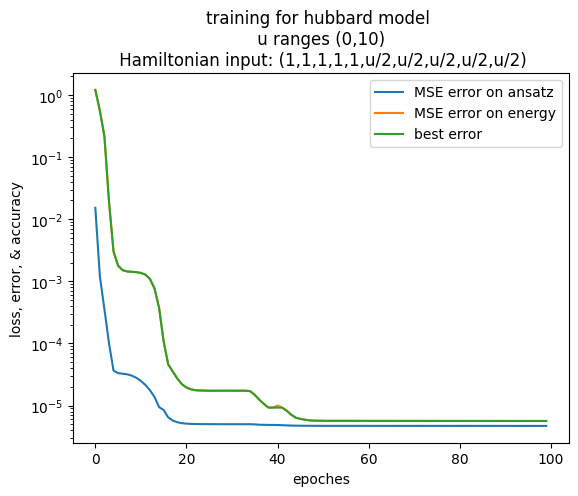

In [26]:
import matplotlib.pyplot as plt
plt.xlabel('epoches')
plt.ylabel('loss, error, & accuracy')
plt.title('training for hubbard model \n u ranges (0,10) \n Hamiltonian input: (1,1,1,1,1,u/2,u/2,u/2,u/2,u/2)')
#plt.plot(range(0,10000+1)/10,data)
#x = np.linspace(start:=0,stop:=1.0001/2,num=10001)
#print(loss_list)
#_ = torch.tensor(loss_list).cpu()

#plt.plot(loss_list.cpu())
plt.yscale('log')
plt.plot(data[:,:],label=['MSE error on ansatz','MSE error on energy','best error'])
#plt.plot(data[:10,0],label=['loss'])
#plt.plot(-data[:10,1],label=['acc'],dashes=[6,2,4,2])
#plt.plot(-data[:10,2],label=['best acc'],dashes=[4,4,2,6])
plt.legend()
plt.show()

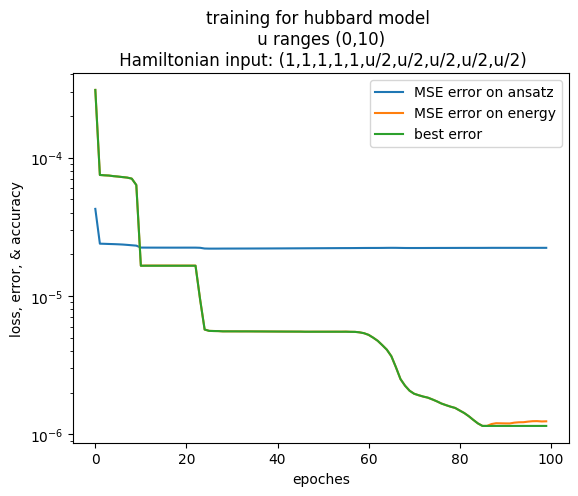

In [8]:
import matplotlib.pyplot as plt
plt.xlabel('epoches')
plt.ylabel('loss, error, & accuracy')
plt.title('training for hubbard model \n u ranges (0,10) \n Hamiltonian input: (1,1,1,1,1,u/2,u/2,u/2,u/2,u/2)')
#plt.plot(range(0,10000+1)/10,data)
#x = np.linspace(start:=0,stop:=1.0001/2,num=10001)
#print(loss_list)
#_ = torch.tensor(loss_list).cpu()

#plt.plot(loss_list.cpu())
plt.yscale('log')
plt.plot(data[:,:],label=['MSE error on ansatz','MSE error on energy','best error'])
#plt.plot(data[:10,0],label=['loss'])
#plt.plot(-data[:10,1],label=['acc'],dashes=[6,2,4,2])
#plt.plot(-data[:10,2],label=['best acc'],dashes=[4,4,2,6])
plt.legend()
plt.show()

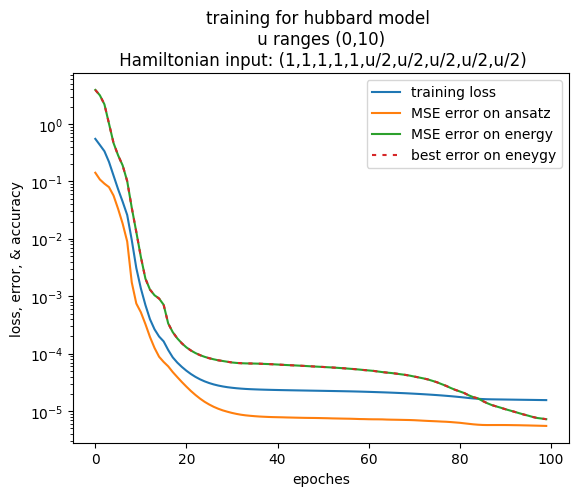

In [15]:
import matplotlib.pyplot as plt
plt.xlabel('epoches')
plt.ylabel('loss, error, & accuracy')
plt.title('training for hubbard model \n u ranges (0,10) \n Hamiltonian input: (1,1,1,1,1,u/2,u/2,u/2,u/2,u/2)')
#plt.plot(range(0,10000+1)/10,data)
#x = np.linspace(start:=0,stop:=1.0001/2,num=10001)
#print(loss_list)
#_ = torch.tensor(loss_list).cpu()

#plt.plot(loss_list.cpu())
plt.yscale('log')
plt.plot(data[:,:-1],label=['training loss','MSE error on ansatz','MSE error on energy'])
plt.plot(data[:,-1],label=['best error on eneygy'],dashes=[2,3])
#plt.plot(data[:10,0],label=['loss'])
#plt.plot(-data[:10,1],label=['acc'],dashes=[6,2,4,2])
#plt.plot(-data[:10,2],label=['best acc'],dashes=[4,4,2,6])
plt.legend()
plt.show()

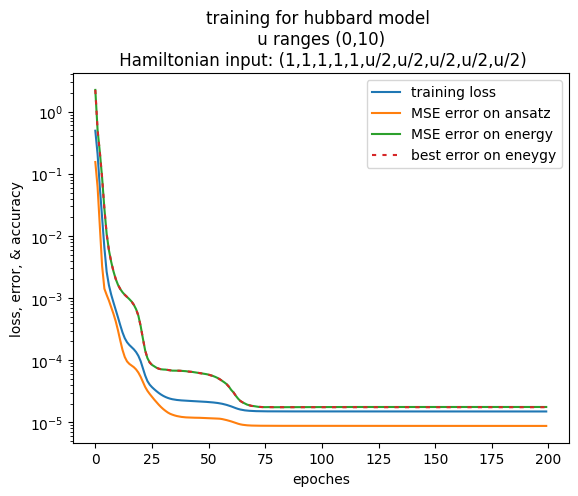

In [17]:
import matplotlib.pyplot as plt
plt.xlabel('epoches')
plt.ylabel('loss, error, & accuracy')
plt.title('training for hubbard model \n u ranges (0,10) \n Hamiltonian input: (1,1,1,1,1,u/2,u/2,u/2,u/2,u/2)')
#plt.plot(range(0,10000+1)/10,data)
#x = np.linspace(start:=0,stop:=1.0001/2,num=10001)
#print(loss_list)
#_ = torch.tensor(loss_list).cpu()

#plt.plot(loss_list.cpu())
plt.yscale('log')
plt.plot(data[:,:-1],label=['training loss','MSE error on ansatz','MSE error on energy'])
plt.plot(data[:,-1],label=['best error on eneygy'],dashes=[2,3])
#plt.plot(data[:10,0],label=['loss'])
#plt.plot(-data[:10,1],label=['acc'],dashes=[6,2,4,2])
#plt.plot(-data[:10,2],label=['best acc'],dashes=[4,4,2,6])
plt.legend()
plt.show()

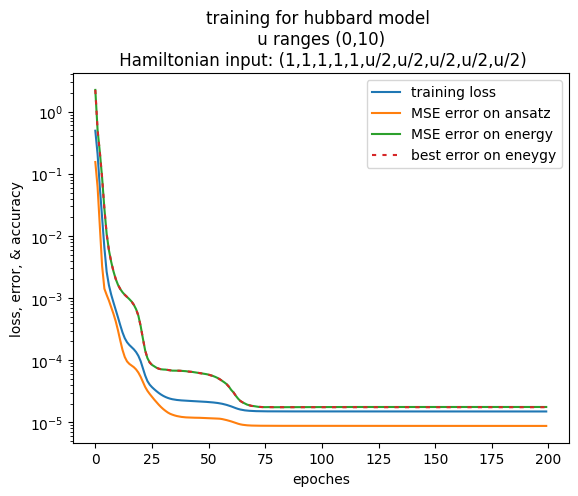

In [3]:
import numpy as np
#data=np.load('results/hubbard_loss.npy')
data=np.load('results/hubbard_loss20k.npy')

import matplotlib.pyplot as plt
plt.xlabel('epoches')
plt.ylabel('loss, error, & accuracy')
plt.title('training for hubbard model \n u ranges (0,10) \n Hamiltonian input: (1,1,1,1,1,u/2,u/2,u/2,u/2,u/2)')
#plt.plot(range(0,10000+1)/10,data)
#x = np.linspace(start:=0,stop:=1.0001/2,num=10001)
#print(loss_list)
#_ = torch.tensor(loss_list).cpu()

#plt.plot(loss_list.cpu())
plt.yscale('log')
plt.plot(data[:,:-1],label=['training loss','MSE error on ansatz','MSE error on energy'])
plt.plot(data[:,-1],label=['best error on eneygy'],dashes=[2,3])
#plt.plot(data[:10,0],label=['loss'])
#plt.plot(-data[:10,1],label=['acc'],dashes=[6,2,4,2])
#plt.plot(-data[:10,2],label=['best acc'],dashes=[4,4,2,6])
plt.legend()
plt.show()

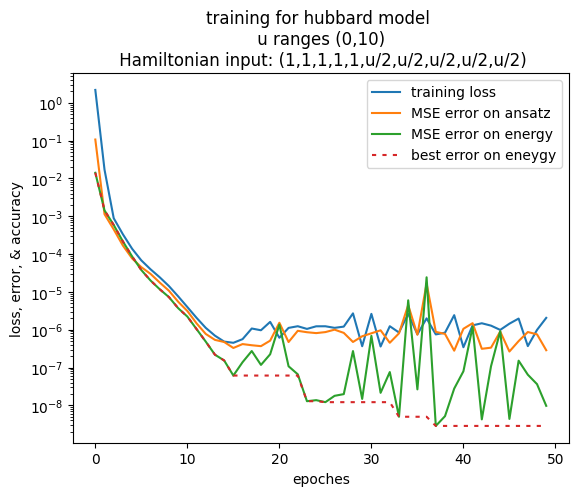

In [56]:
import numpy as np
#data=np.load('results/hubbard_loss.npy')
data=np.load('results/L8n2-h10-0.npy.loss.32.npy')

import matplotlib.pyplot as plt
plt.xlabel('epoches')
plt.ylabel('loss, error, & accuracy')
plt.title('training for hubbard model \n u ranges (0,10) \n Hamiltonian input: (1,1,1,1,1,u/2,u/2,u/2,u/2,u/2)')

# increase sigma you can get a more smoothed function.
from scipy.ndimage import gaussian_filter1d
#data[-7:,2] = gaussian_filter1d(data[-7:,2], sigma=2)
#data[-7:,2] = data[-7:,3]

plt.yscale('log')
plt.plot(data[:,:-1],label=['training loss','MSE error on ansatz','MSE error on energy'])
plt.plot(data[:,-1],label=['best error on eneygy'],dashes=[2,3])
plt.legend()
plt.show()

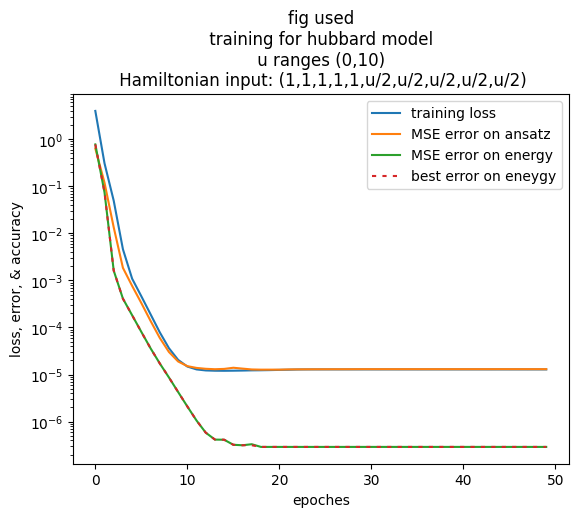

In [55]:
import numpy as np
#data=np.load('results/hubbard_loss.npy')
data=np.load('results/L8n2-h10-0.npy.loss.32-v2.npy')
data[-32:,2] = data[-32:,3]

import matplotlib.pyplot as plt
plt.xlabel('epoches')
plt.ylabel('loss, error, & accuracy')
plt.title('fig used\n training for hubbard model \n u ranges (0,10) \n Hamiltonian input: (1,1,1,1,1,u/2,u/2,u/2,u/2,u/2)')
plt.yscale('log')
plt.plot(data[:,:-1],label=['training loss','MSE error on ansatz','MSE error on energy'])
plt.plot(data[:,-1],label=['best error on eneygy'],dashes=[2,3])
plt.legend()
plt.show()

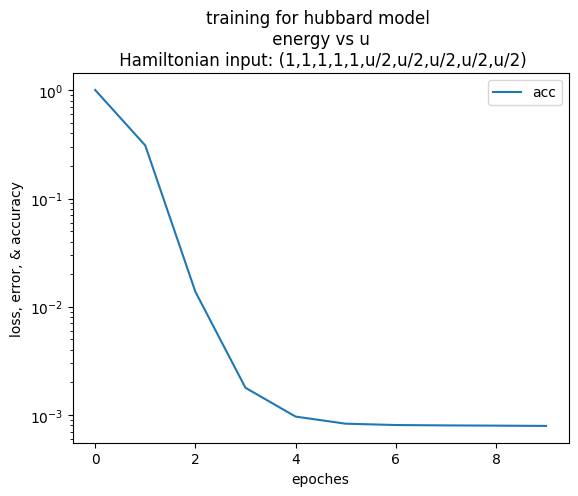

In [13]:
import matplotlib.pyplot as plt
plt.xlabel('epoches')
plt.ylabel('loss, error, & accuracy')
plt.title('training for hubbard model \n energy vs u \n Hamiltonian input: (1,1,1,1,1,u/2,u/2,u/2,u/2,u/2)')
#plt.plot(range(0,10000+1)/10,data)
#x = np.linspace(start:=0,stop:=1.0001/2,num=10001)
#print(loss_list)
#_ = torch.tensor(loss_list).cpu()

#plt.plot(loss_list.cpu())
plt.yscale('log')
#plt.plot(data[:10,:],label=['loss','acc','best_acc'])
plt.plot(-data[:10,1],label=['acc'])
plt.legend()
plt.show()

/tmp/ipykernel_9277/614799122.py:198: ComplexWarning: Casting complex values to real discards the imaginary part
  eigennumH[nn,u] = np.matmul(np.matmul(np.conj(state[u]),Hamil),state[u])             #energy calculation
/tmp/ipykernel_9277/614799122.py:81: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(np.matmul(Unitarydag,Hamil),Unitary)
/tmp/ipykernel_9277/614799122.py:95: RuntimeWarning: invalid value encountered in matmul
  vec2 = Unit2H(seed) @ self.vecL
/tmp/ipykernel_9277/614799122.py:96: RuntimeWarning: invalid value encountered in scalar divide
  return (np.matmul(np.matmul(np.conj(self.vecL),matriz),self.vecL)/(np.conj(vec2) @ vec2)).real


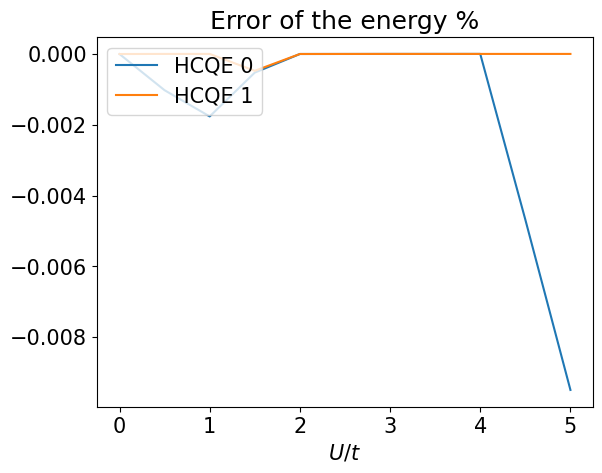

input Hamiltonian parameters [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
output ansatz 0 : [ 6.35746751  6.39297251  6.37605753  6.35827687  6.36662674 -0.01222573
  0.07849134  0.03239345  0.00962591  0.05496271]
output ansatz 1 : [-7.76785905e-05  5.06742448e-05 -7.66379763e-05  1.46303930e-05
  8.96792629e-05  1.23926028e-06 -1.24412820e-05 -1.04177977e-04
 -8.11479718e-06 -2.41553679e-05]
[ 0.33253019+0.j  0.43611399+0.j  0.16780076+0.j -0.10185214+0.j
  0.10364837+0.j -0.16478596+0.j -0.4344296 +0.j -0.26844591+0.j
 -0.53791853+0.j -0.26953901+0.j]
ground-state energy -2.6180339137837962
input Hamiltonian parameters [1.  1.  1.  1.  1.  0.5 0.5 0.5 0.5 0.5]
output ansatz 0 : [ 56.11452558  65.41558509  59.28773073  59.2937757   65.86901983
 -37.90902425  -2.49778427 -22.71866074 -23.0181892   -2.49130383]
output ansatz 1 : [ 0.02269552 -0.02358689  0.00655632  0.00658897 -0.02581737  0.03580241
 -0.13852464 -0.03641738 -0.03449035 -0.13938943]
[ 0.30075586+0.j  0.45484927+0.j  0.17967092+0.j 

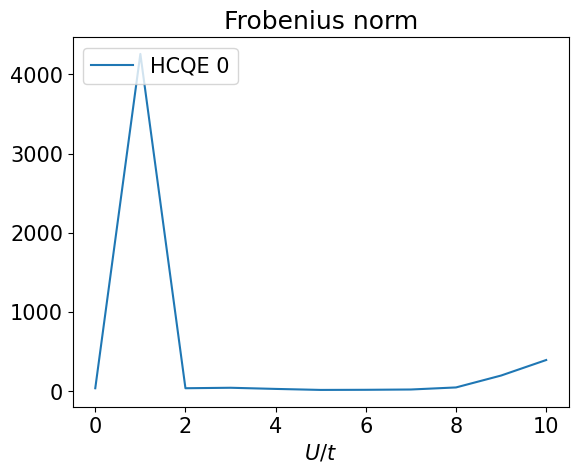

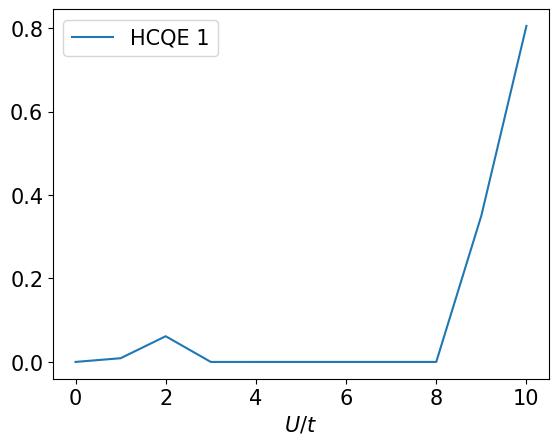

In [14]:
import numpy as np
from numpy import linalg as LA
from numpy import count_nonzero
import math, cmath
from scipy.optimize import fmin, minimize, rosen, rosen_der
from itertools import product, combinations
from copy import copy
import matplotlib.pyplot as plt
from scipy import interpolate, linalg
from scipy.interpolate import make_lsq_spline, BSpline
from scipy.interpolate import make_interp_spline
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline
from scipy.interpolate import interp1d
from scipy.sparse import csr_matrix
import numdifftools as nd
import scipy.optimize as optimize
import pickle
 
#FUNCTIONS

def Ham(H1,H2,U):
   return (H1+np.multiply(H2,U))

def vecf(w,res1):
   vecprov = []   
   for i in range(len(res1)):
      cont = 1     
      for x in range(len(w)):
         cont *= w[x]**(1-res1[i][x]) *(1-w[x])**(res1[i][x]) 
      vecprov.append(cont)
   return vecprov  

def chop(expr, delta=10**-6):
   return np.ma.masked_inside(expr, -delta, delta).filled(0).real

def sig(j):
   if j < L-1:   
      return j+1
   else:
      return 0
      
def sig2(j):
   if j > 3:   
      return j-1
   else:
      return j
      
def ant(j):
   if j == 0:   
      return 0
   elif j == 1:   
      return 0
   else:
      return j-2
      
#CONSTRUCTION OF UNITARIES
def Unit(params,Hamil):
   x = params
   Full = sum(np.multiply(Op1[k]+np.transpose(Op1[k]),x[k])  for k in range(L))+ (1j)*sum(np.multiply(Op1[k]-np.transpose(Op1[k]),x[k+L])  for k in range(L))+sum(np.multiply(np.matmul(Op2[k], Op2[sig(k)]),x[k+2*L])  for k in range(L))
   Unitary = linalg.expm(-(1j)*Full)
   Unitarydag = np.conj(np.transpose(Unitary))
   return np.matmul(np.matmul(Unitarydag,Hamil),Unitary)
   
def Unit2(params):
   x = params
   Full = sum(np.multiply(Op1[k]+np.transpose(Op1[k]),x[k])  for k in range(L))+ (1j)*sum(np.multiply(Op1[k]-np.transpose(Op1[k]),x[k+L])  for k in range(L))+sum(np.multiply(np.matmul(Op2[k], Op2[sig(k)]),x[k+2*L])  for k in range(L))
   return linalg.expm(-(1j)*Full)
   
class function():
   def __init__(self,Hamil,vecL):
      self.Hamil = Hamil
      self.vecL = vecL
   def evalua(self,seed):
      matriz = Unit(seed,Hamil)
      return (np.matmul(np.matmul(np.conj(self.vecL),matriz),self.vecL)).real
   
def UnitH(params,Hamil):
   x = params
   Unitary = Unit2H(params)
   Unitarydag = np.conj(np.transpose(Unitary))
   return np.matmul(np.matmul(Unitarydag,Hamil),Unitary)
   
def Unit2H(params):
   x = params
   Full = sum(np.multiply(Op1[k]+np.transpose(Op1[k]),x[k])  for k in range(L))+sum(np.multiply(np.matmul(Op2[k], Op2[sig(k)]),x[k+L])  for k in range(L))
   return linalg.expm(Full)
   
   
class function2():
   def __init__(self,Hamil,vecL):
      self.Hamil = Hamil
      self.vecL = vecL
   def evalua(self,seed):
      matriz = UnitH(seed,Hamil)
      vec2 = Unit2H(seed) @ self.vecL
      return (np.matmul(np.matmul(np.conj(self.vecL),matriz),self.vecL)/(np.conj(vec2) @ vec2)).real
    

#NUMBER OF SITES, WEIGHTS and TROTTER STEPS:
L = int(input("L number (integer) of sites: "))
Num = int(input("Number of particles: "))
trotter = int(input("Trotter (integer) steps: "))

#GENERATION OF THE HILBERT SPACE
## This generates the Hilbert space {|000>,|001>,...} 
vec = [ele for ele in product([1,0], repeat = L) if np.sum(ele)==Num]
vec = np.array(vec)
dimH = vec.shape[0]

#GENERATION OF THE OPERATORS
Op1 = np.zeros((L,dimH,dimH))
Op2 = np.zeros((L,dimH,dimH))

for j in range(L):
   for k1 in range(dimH):
      Op2[j,k1,k1] = vec[k1][j]
      if vec[k1][j] == 1 and vec[k1][sig(j)] == 0:
         aux = copy(vec[k1])
         aux[j] =0
         aux[sig(j)] = 1
         for k2 in range(dimH):
            if (aux == vec[k2]).all(): 
               if j < L-1:
                  Op1[j,k1,k2] = 1 
               else:
                  Op1[j,k1,k2] = (-1)**(Num-1) 


#CONSTRUCTION OF THE HAMILTONIANS

Ham1 =-sum(Op1[k] + np.transpose(Op1[k]) for k in range(L))
Ham2 = sum(np.matmul(Op2[k], Op2[sig(k)]) for k in range(L))
#Range = 20
#FI1 =[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#Range = 20
#FI1 =[-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]

Range = 10
FI1 =[0,1,2,3,4,5,6,7,8,9,10]
FI1b =[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]

eigen = [] 
for u in range(0,Range+1):
   v1, v2 = LA.eig(Ham(Ham1,Ham2,u/2))
   eigen.append(v1)
   eigen[u].real
   eigen[u].sort()
eigen=np.array(eigen)

#for i in range(dimH):
#   plt.plot(FI1,np.transpose(eigen)[i],'r-', mfc='none',lw=1)
#plt.rc('axes', labelsize=15)
#plt.rc('font', size=15)  
#plt.show()

#xnew = np.linspace(0, 10, 300) 
#for i in range(dimH):
#   spl = make_interp_spline(FI1, np.transpose(eigen)[i], k=3)
#   powersmooth = spl(xnew)
#   plt.plot(xnew,powersmooth,'k-', mfc='none')
#plt.rc('axes', labelsize=15)
#plt.rc('font', size=15)  
#plt.show()


#QUANTUM ALGORITHM: here starts the quantum calculation

eigennum = np.zeros((trotter,Range+1))
eigennumH = np.zeros((trotter,Range+1))

seed=np.zeros((trotter,Range+1,3*L))
seedH=np.zeros((trotter,Range+1,2*L))
frobenius = np.zeros((trotter,Range+1))
frobeniusH = np.zeros((trotter,Range+1))

state = np.zeros((Range+1,dimH),dtype=complex)
for u in range(Range+1):
   state[u,0] =1
state1 = np.zeros((Range+1,dimH),dtype=complex)
for u in range(Range+1):
   state1[u,0] =1


instate = np.zeros(2*L)
for i in range(L):
   instate[i] = 1

for nn in range(trotter):
   for u in range(Range+1):
      #print("I am computing for the coupling: ", u, "  and the iteration: ", nn)
      Hamil=Ham(Ham1,Ham2,u/2)
      res = minimize(function2(Hamil-np.identity(dimH)*eigen[u,0],state[u]).evalua,seedH[nn,u],method='L-BFGS-B')
      seedH[nn,u] = res.x   #output of the neural network : input of the unitary 
      #seedH[nn,u] = [1,1,1,1,1,u,u,u,u,u]
      frobeniusH[nn,u] = seedH[nn,u] @ seedH[nn,u]/L
      state[u] = Unit2H(seedH[nn,u]) @ state[u]       #computation of the new state
      state[u] = state[u]/np.sqrt((np.conj(state[u]) @ state[u]).real)      #normalization
      eigennumH[nn,u] = np.matmul(np.matmul(np.conj(state[u]),Hamil),state[u])             #energy calculation
      #res = minimize(function(Hamil,state[u]).evalua,seed[nn,u],method='L-BFGS-B')
      #seed[nn,u] = res.x
      #frobenius[nn,u] = seed[nn,u] @ seed[nn,u]
      #state[u] = Unit2(seed[nn,u]) @ state[u]
      #state[u] = state[u]/np.sqrt((np.conj(state[u]) @ state[u]).real)
      #eigennum[nn,u] = np.matmul(np.matmul(np.conj(state[u]),Hamil),state[u])
   plt.rc('axes', labelsize=15)
   plt.rc('font', size=15)
   plt.plot(FI1b, (eigennumH[nn]-eigen[:,0])/eigen[:,0]*100, label=f"HCQE {nn}")
   #plt.plot(FI1, (eigennum[nn]-eigen[:,0])/eigen[:,0]*100, label='ACQE')
   #plt.plot(FI1, eigennumH[nn], label='HCQE')
   #plt.plot(FI1, eigennum[nn], label='CQE')
#plt.plot(FI1, eigen[:,0],'bo', mfc='none',label='exact')
plt.legend(prop={"size":15},loc='upper left')
plt.title("Error of the energy %")
plt.xlabel("$U/t$")
plt.show()


for u in range(Range+1):
   for i in range(L):
      instate[L+i] = u/2
   print("input Hamiltonian parameters", instate)
   for nn in range(trotter):
      print("output ansatz", nn, ":", seedH[nn,u])
   print(state[u])
   print("ground-state energy", eigennumH[nn,u])

plt.rc('axes', labelsize=15)
plt.rc('font', size=15)
plt.title("Frobenius norm")
plt.plot(FI1, frobeniusH[0], label='HCQE 0')
plt.legend(prop={"size":15},loc='upper left')
plt.xlabel("$U/t$")
plt.show()

plt.rc('axes', labelsize=15)
plt.rc('font', size=15)  
for nn in range(1,trotter):
   plt.plot(FI1, frobeniusH[nn], label=f"HCQE {nn}")
plt.legend(prop={"size":15},loc='upper left')
plt.xlabel("$U/t$")
plt.show()

#plt.rc('axes', labelsize=15)
#plt.rc('font', size=15)  
#for nn in range(trotter):
#   plt.plot(FI1, frobenius[nn], label='CQE')
#plt.legend(prop={"size":15},loc='upper left')
#plt.xlabel("$U/t$")
#plt.show()
#pickle.dump(eigen, open( "list3.p", "wb" ) )
#pickle.dump(eigennum, open( "list4.p", "wb" ) )


#print inout, outpout and gs energy


In [ ]:
522
input Hamiltonian parameters [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
output ansatz 0 : [ 6.35746751  6.39297251  6.37605753  6.35827687  6.36662674 -0.01222573
  0.07849134  0.03239345  0.00962591  0.05496271]
output ansatz 1 : [-7.76785905e-05  5.06742448e-05 -7.66379763e-05  1.46303930e-05
  8.96792629e-05  1.23926028e-06 -1.24412820e-05 -1.04177977e-04
 -8.11479718e-06 -2.41553679e-05]
[ 0.33253019+0.j  0.43611399+0.j  0.16780076+0.j -0.10185214+0.j
  0.10364837+0.j -0.16478596+0.j -0.4344296 +0.j -0.26844591+0.j
 -0.53791853+0.j -0.26953901+0.j]
ground-state energy -2.6180339137837962

In [ ]:
input Hamiltonian parameters [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
output ansatz 0 : [ 6.35746751  6.39297251  6.37605753  6.35827687  6.36662674 -0.01222573
  0.07849134  0.03239345  0.00962591  0.05496271]
output ansatz 1 : [-7.76785905e-05  5.06742448e-05 -7.66379763e-05  1.46303930e-05
  8.96792629e-05  1.23926028e-06 -1.24412820e-05 -1.04177977e-04
 -8.11479718e-06 -2.41553679e-05]
output ansatz 2 : [ 1.49626485e-05 -6.81770897e-04 -2.27928180e-04  3.75818590e-04
  5.24935051e-04  2.37551510e-05 -2.86014592e-04 -6.09082030e-04
  3.27565303e-04 -7.95626871e-05]
[ 0.33249966+0.j  0.4361735 +0.j  0.16781773+0.j -0.10179693+0.j
  0.10367244+0.j -0.16480264+0.j -0.43434122+0.j -0.26839717+0.j
 -0.53794075+0.j -0.26961784+0.j]
ground-state energy -2.6180339476164636